<a href="https://colab.research.google.com/github/erena29/Data-Analysis-Python/blob/main/Natural%20Disaster%20and%20Economic%20Damage/NatDisaster_EconDamage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Disaster

## **Data Science and Statistical Analysis**

Descriptive and Inferential Statistics, EDA, and Statistical Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and read data

In [ ]:
sheet_url ='https://docs.google.com/spreadsheets/d/1otk_yno_ykrAHb3UR_9iCYhbLT4eSmRUvSnOM0V-IYs/edit#gid=239369352'
sheet_url_trf=sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1otk_yno_ykrAHb3UR_9iCYhbLT4eSmRUvSnOM0V-IYs/export?format=csv&gid=239369352


,entity,year,frequency_reported,economic_damage
0,All natural disasters,1900,5,30000000.0
1,All natural disasters,1901,2,0.0
2,All natural disasters,1902,9,0.0
3,All natural disasters,1903,8,480000000.0
4,All natural disasters,1904,2,0.0


In [ ]:
# Check the different types of 'Entity' values
df['entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [ ]:
# Checking duplicate values
df.duplicated().sum()

0

### Prepare the Data

Kolom `Entity` berisi 10 jenis bencana alam dan penjumlahan dari seluruh bencana alam terdapat pada jenis `All natural disasters`. Untuk analisa lebih lanjut sebaiknya data disusun kembali sesuai kategori bencana.

In [ ]:
# Pivot the dataframe
df_freq=df.drop('economic_damage', axis = 1)
df_freq = df_freq.pivot(index = 'year',columns = 'entity', values = 'frequency_reported')
df_freq.head()

entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Ada beberapa nilai `NaN` yang bisa berarti nilai yang hilang atau kejadian bencana yang tidak dilaporkan. Untuk analisis ini, akandiganti dengan 0, yang berarti tidak ada bencana yang terjadi.

In [ ]:
# Handle missing values
df_freq.fillna(value = 0, inplace = True)

# Rename columns
df_freq = df_freq.add_suffix(' (Occurrence)')
df_freq.head()

entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Pivot the dataframe
df_econ=df.drop('frequency_reported', axis = 1)
df_econ = df_econ.pivot(index = 'year',columns = 'entity', values ='economic_damage')
df_econ.head()

entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Handle missing values
df_econ.fillna(value = 0, inplace = True)

# Rename columns
df_econ = df_econ.add_suffix(' (Economic Damage)')
df_econ.head()

entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Impact (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
year,,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Gabungkan dua kerangka data utama (`Data Occurrence` dan `Data Economic Damage`)

In [ ]:
df_merger = pd.merge(df_freq, df_econ, on = 'year',how='left')
df_merger.head()

entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Impact (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
year,,,,,,,,,,,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ***Statistics Descriptive***

In [ ]:
df_merger[['All natural disasters (Occurrence)', 'All natural disasters (Economic Damage)']].describe()

entity,All natural disasters (Occurrence),All natural disasters (Economic Damage)
count,119.000000,1.190000e+02
mean,111.025210,2.703563e+10
std,133.958282,5.517178e+10
min,2.000000,0.000000e+00
25%,10.500000,6.075000e+07
50%,33.000000,1.043000e+09
75%,202.000000,2.725059e+10
max,432.000000,3.640932e+11


Didapatkan hasil bahwa rata-rata jumlah `kejadian bencana alam` selama 1900-2018 sebanyak 111.025210 kejadian/tahun, dengan simpangan baku 133.958282	kejadian/tahun, nilai minimal terdapat 2 kejadian/tahun dan nilai maksimal terdapat 432 kejadian/tahun.

Sedangkan rata-rata `kerusakan ekonomi` selama 1900-2018 adalah 27.035630 milliar US dolar/tahun, dengan simpangan baku 55.171783 milliar US dolar/tahun, nilai minimal 0 milliar US dolar/tahun dan nilai maksimum 364.093168 miliar US dolar/tahun

#### by Natural Disaster

In [ ]:
df_merger[['Drought (Occurrence)', 'Drought (Economic Damage)']].describe()

entity,Drought (Occurrence),Drought (Economic Damage)
count,119.000000,1.190000e+02
mean,6.109244,1.401361e+09
std,7.755577,3.683608e+09
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,1.000000,0.000000e+00
75%,11.000000,6.985000e+08
max,32.000000,2.548000e+10


In [ ]:
df_merger[['Earthquake (Occurrence)', 'Earthquake (Economic Damage)']].describe()

entity,Earthquake (Occurrence),Earthquake (Economic Damage)
count,119.000000,1.190000e+02
mean,11.529412,6.847911e+09
std,10.870442,2.516948e+10
min,0.000000,0.000000e+00
25%,3.000000,0.000000e+00
50%,6.000000,1.000000e+08
75%,20.500000,2.075107e+09
max,43.000000,2.302998e+11


In [ ]:
df_merger[['Extreme temperature (Occurrence)', 'Extreme temperature (Economic Damage)']].describe()

entity,Extreme temperature (Occurrence),Extreme temperature (Economic Damage)
count,119.000000,1.190000e+02
mean,4.831933,5.282886e+08
std,8.772375,2.372630e+09
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,5.500000,5.650000e+07
max,51.000000,2.194000e+10


In [ ]:
df_merger[['Extreme weather (Occurrence)', 'Extreme weather (Economic Damage)']].describe()

entity,Extreme weather (Occurrence),Extreme weather (Economic Damage)
count,119.000000,1.190000e+02
mean,34.697479,1.076975e+10
std,39.265190,2.559805e+10
min,0.000000,0.000000e+00
25%,3.000000,1.400000e+07
50%,14.000000,3.991500e+08
75%,63.000000,6.204074e+09
max,137.000000,1.847935e+11


In [ ]:
df_merger[['Flood (Occurrence)', 'Flood (Economic Damage)']].describe()

entity,Flood (Occurrence),Flood (Economic Damage)
count,119.000000,1.190000e+02
mean,41.680672,6.623632e+09
std,59.058996,1.330972e+10
min,0.000000,0.000000e+00
25%,1.000000,0.000000e+00
50%,9.000000,3.000000e+08
75%,59.500000,5.093654e+09
max,226.000000,7.075705e+10


In [ ]:
df_merger[['Impact (Occurrence)', 'Impact (Economic Damage)']].describe()

entity,Impact (Occurrence),Impact (Economic Damage)
count,119.000000,1.190000e+02
mean,0.008403,2.773109e+05
std,0.091670,3.025105e+06
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,1.000000,3.300000e+07


In [ ]:
df_merger[['Landslide (Occurrence)', 'Landslide (Economic Damage)']].describe()

entity,Landslide (Occurrence),Landslide (Economic Damage)
count,119.000000,1.190000e+02
mean,5.983193,8.811205e+07
std,7.858907,2.438291e+08
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,2.000000,0.000000e+00
75%,10.500000,6.350000e+06
max,32.000000,1.277078e+09


In [ ]:
df_merger[['Mass movement (dry) (Occurrence)', 'Mass movement (dry) (Economic Damage)']].describe()

entity,Mass movement (dry) (Occurrence),Mass movement (dry) (Economic Damage)
count,119.000000,1.190000e+02
mean,0.478992,1.778151e+06
std,0.998717,1.834128e+07
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,1.000000,0.000000e+00
max,5.000000,2.000000e+08


In [ ]:
df_merger[['Volcanic activity (Occurrence)', 'Volcanic activity (Economic Damage)']].describe()

entity,Volcanic activity (Occurrence),Volcanic activity (Economic Damage)
count,119.000000,1.190000e+02
mean,2.092437,3.305808e+07
std,2.527783,1.372252e+08
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,1.000000,0.000000e+00
75%,3.000000,0.000000e+00
max,12.000000,1.000000e+09


In [ ]:
df_merger[['Wildfire (Occurrence)', 'Wildfire (Economic Damage)']].describe()

entity,Wildfire (Occurrence),Wildfire (Economic Damage)
count,119.000000,1.190000e+02
mean,3.613445,7.414645e+08
std,5.686900,2.467754e+09
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,1.000000,0.000000e+00
75%,5.000000,1.313345e+08
max,30.000000,2.274500e+10


### ***Histogram***

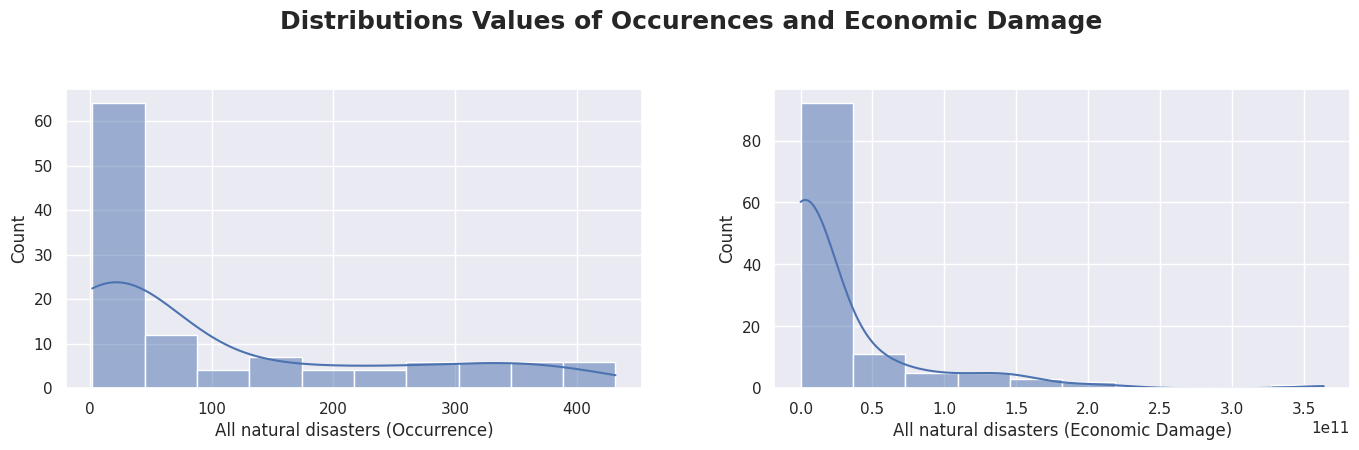

In [ ]:
sns.set_theme()

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Distributions Values of Occurences and Economic Damage ',fontweight='bold',fontsize = 18)

# Plot Data
sns.histplot(ax=axes[0,], data=df_merger, x='All natural disasters (Occurrence)', kde=True,bins=10)
sns.histplot(ax=axes[1,], data=df_merger, x='All natural disasters (Economic Damage)', kde=True,bins=10)

# Show Plot
plt.show()

Kedua histogram ini menunjukkan skewness positif karena cenderung condong ke kanan (ekor panjang di sebelah kanan) atau distribusi data tersebut lebih berat di sebelah kiri daripada rata-rata. Data mungkin memiliki beberapa outlier yang merupakan nilai-nilai yang jauh lebih tinggi daripada nilai-nilai sebagian besar data.

Namun, skewness positif tidak selalu berarti ada outlier dalam data. Untuk mengecek apakah ada outlier atu tidak, dapat diidentifikasi dengan boxplot

### by Natural Disasters

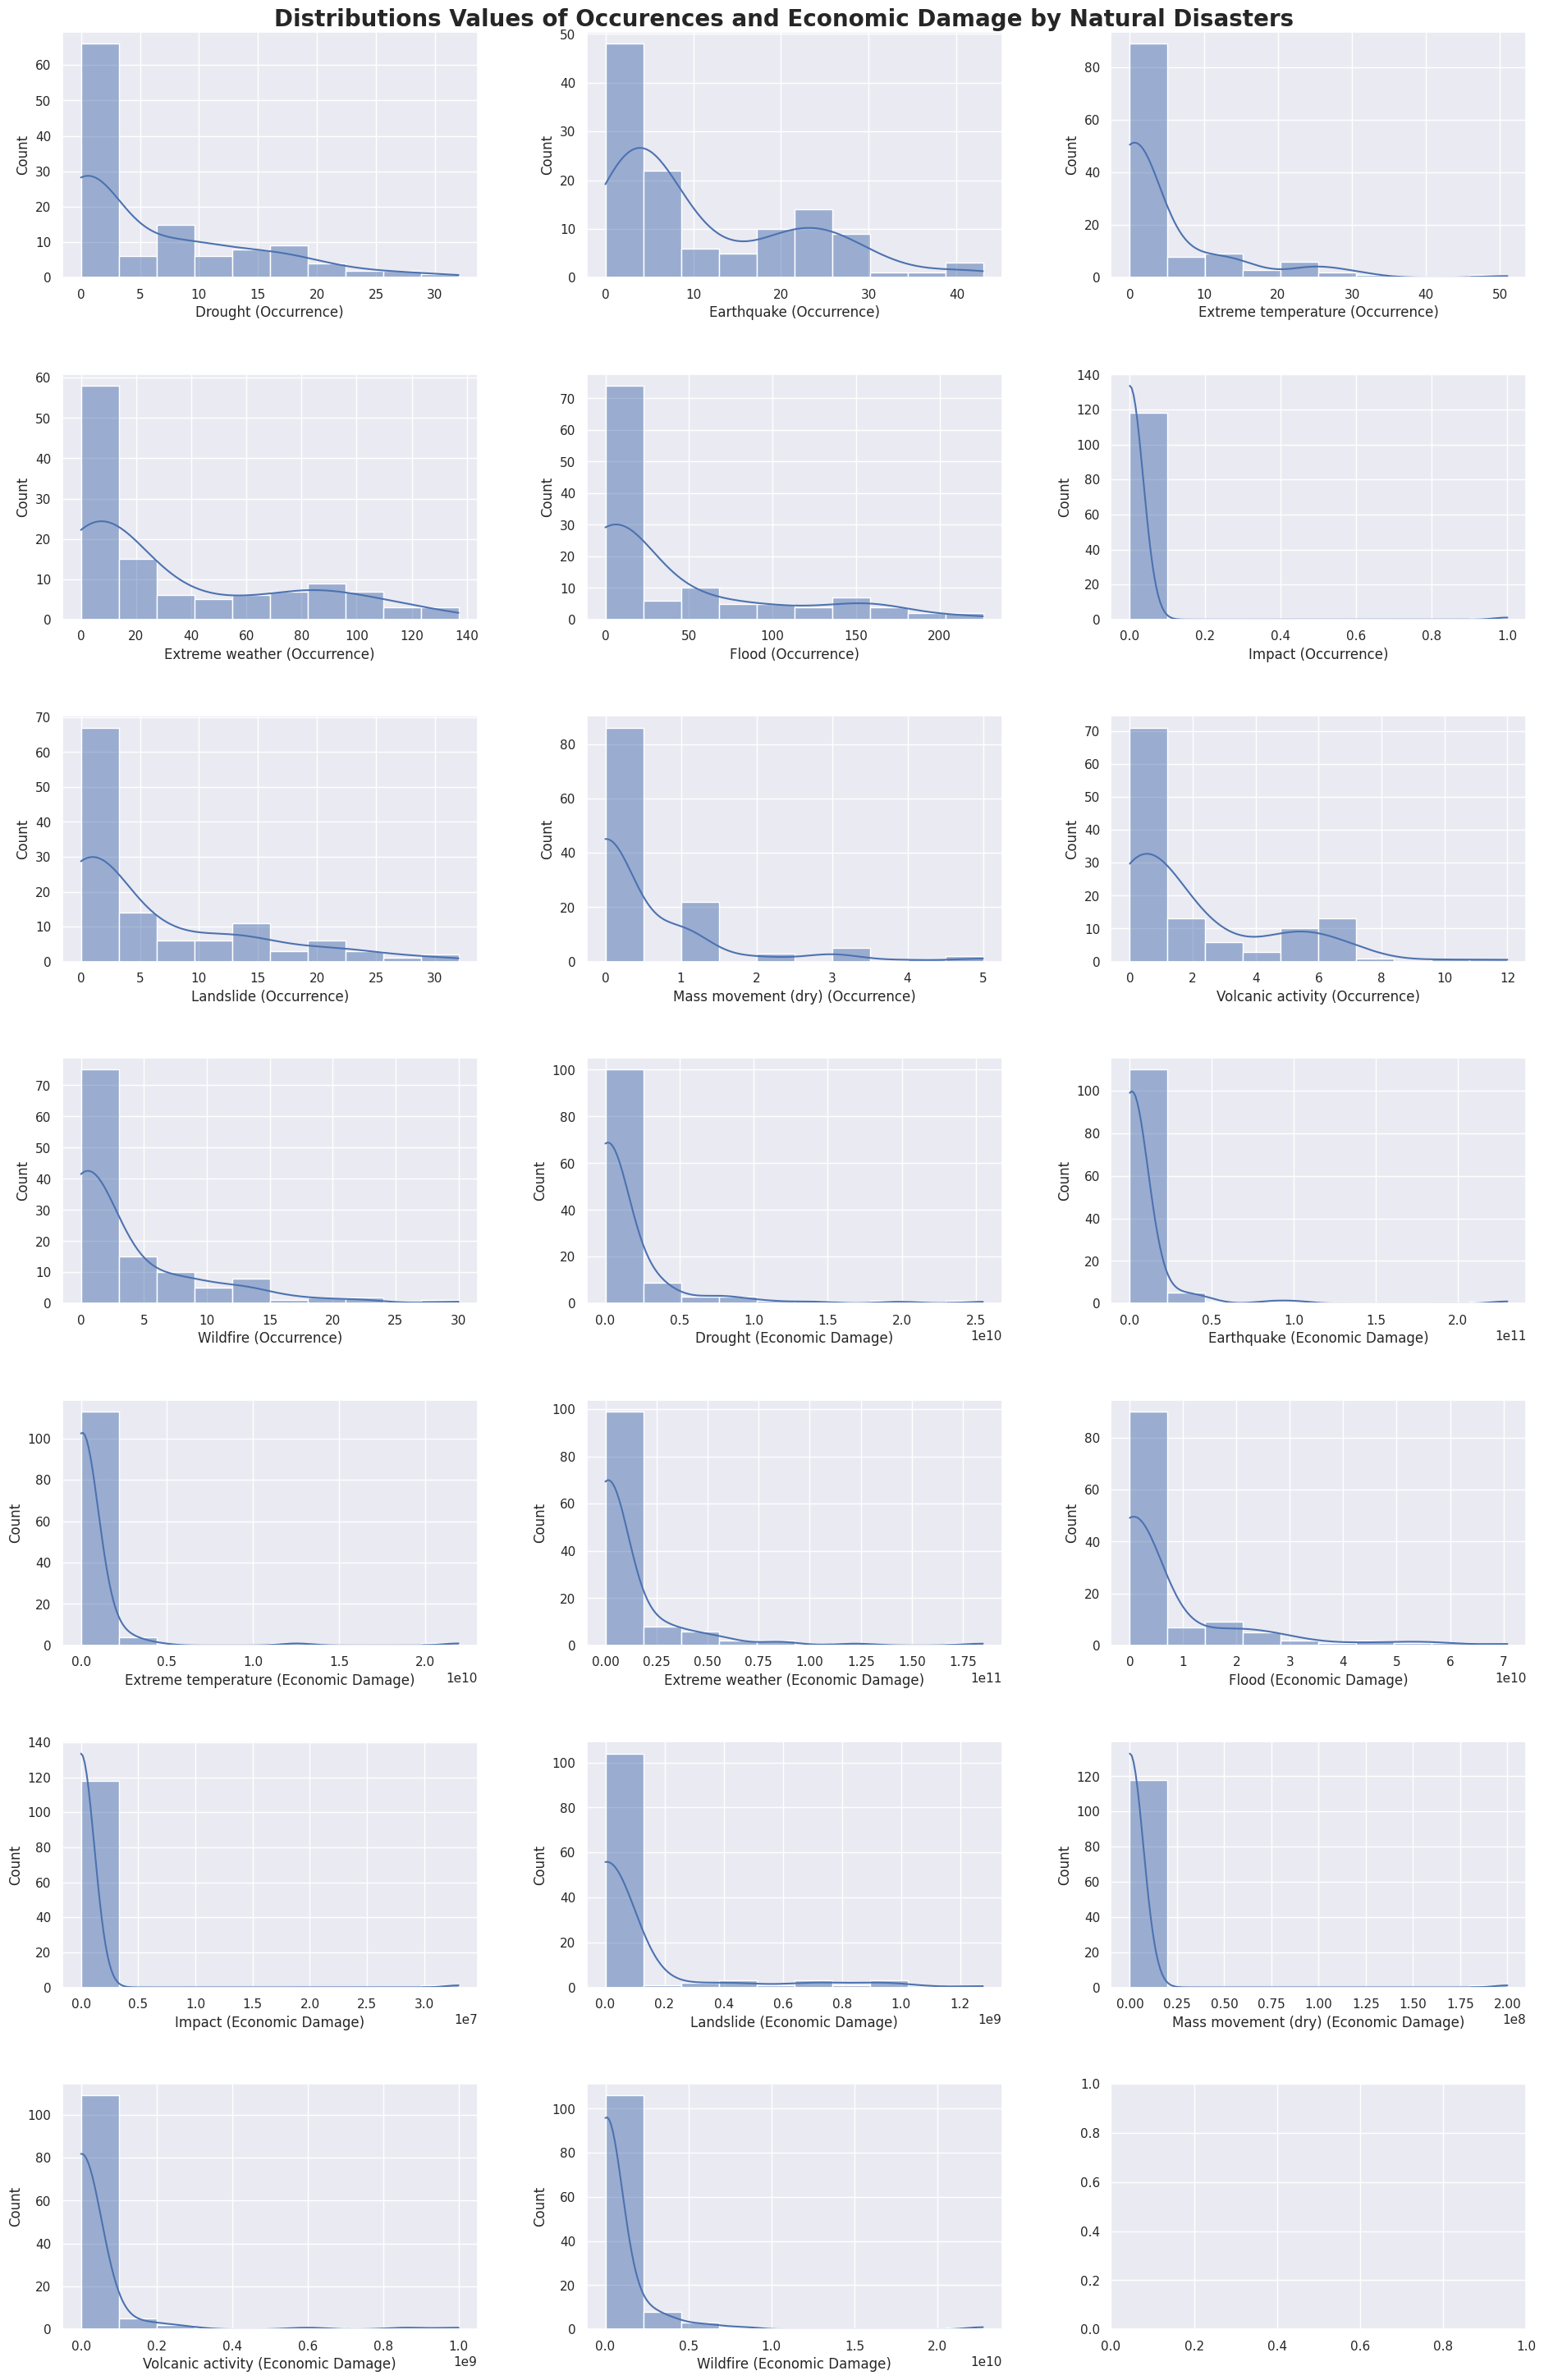

In [ ]:
# Create Subplots
fig, axes = plt.subplots(7, 3, figsize=(20,30))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Distributions Values of Occurences and Economic Damage by Natural Disasters',fontweight='bold',fontsize = 20)

# Plot Data
sns.histplot(ax=axes[0,0], data=df_merger, x='Drought (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[0,1], data=df_merger, x='Earthquake (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[0,2], data=df_merger, x='Extreme temperature (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[1,0], data=df_merger, x='Extreme weather (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[1,1], data=df_merger, x='Flood (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[1,2], data=df_merger, x='Impact (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[2,0], data=df_merger, x='Landslide (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[2,1], data=df_merger, x='Mass movement (dry) (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[2,2], data=df_merger, x='Volcanic activity (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[3,0], data=df_merger, x='Wildfire (Occurrence)',bins=10, kde=True)
sns.histplot(ax=axes[3,1], data=df_merger, x='Drought (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[3,2], data=df_merger, x='Earthquake (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[4,0], data=df_merger, x='Extreme temperature (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[4,1], data=df_merger, x='Extreme weather (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[4,2], data=df_merger, x='Flood (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[5,0], data=df_merger, x='Impact (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[5,1], data=df_merger, x='Landslide (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[5,2], data=df_merger, x='Mass movement (dry) (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[6,0], data=df_merger, x='Volcanic activity (Economic Damage)',bins=10, kde=True)
sns.histplot(ax=axes[6,1], data=df_merger, x='Wildfire (Economic Damage)',bins=10, kde=True)

# Show Plot
plt.show()

Seluruh histogram  menunjukkan skewness positif karena cenderung condong ke kanan (ekor panjang di sebelah kanan) atau distribusi data tersebut lebih berat di sebelah kiri daripada rata-rata

### ***Boxplot***

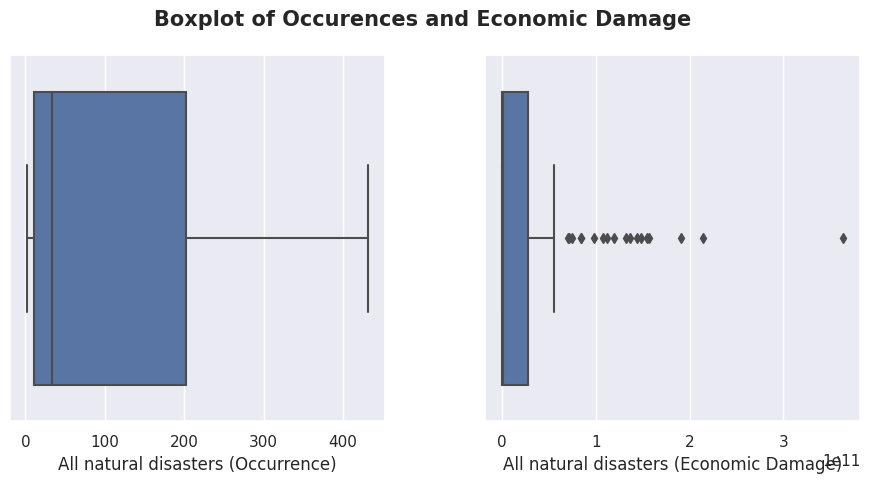

In [ ]:
# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Adjust Layout
fig.tight_layout(pad=3)

# Set Title
fig.suptitle('Boxplot of Occurences and Economic Damage',fontweight='bold',fontsize = 15)

# Plot Data
sns.boxplot(ax=axes[0,], data=df_merger, x='All natural disasters (Occurrence)')
sns.boxplot(ax=axes[1,], data=df_merger, x='All natural disasters (Economic Damage)')

# Show Plot
plt.show()

Pada boxplot `Occurrence` tidak terdapat outlier. Boxplot tanpa outlier menunjukkan bahwa sebagian besar data berada dalam kisaran yang relatif seragam dan tidak ada nilai-nilai ekstrem yang signifikan.

Sedangkan pada boxplot `Economic Damage` terdapat banyak titik yang outlier. Boxplot dengan outlier mengindikasikan keberadaan nilai-nilai yang signifikan yang berbeda dari sebagian besar data.

#### by Natural Disasters

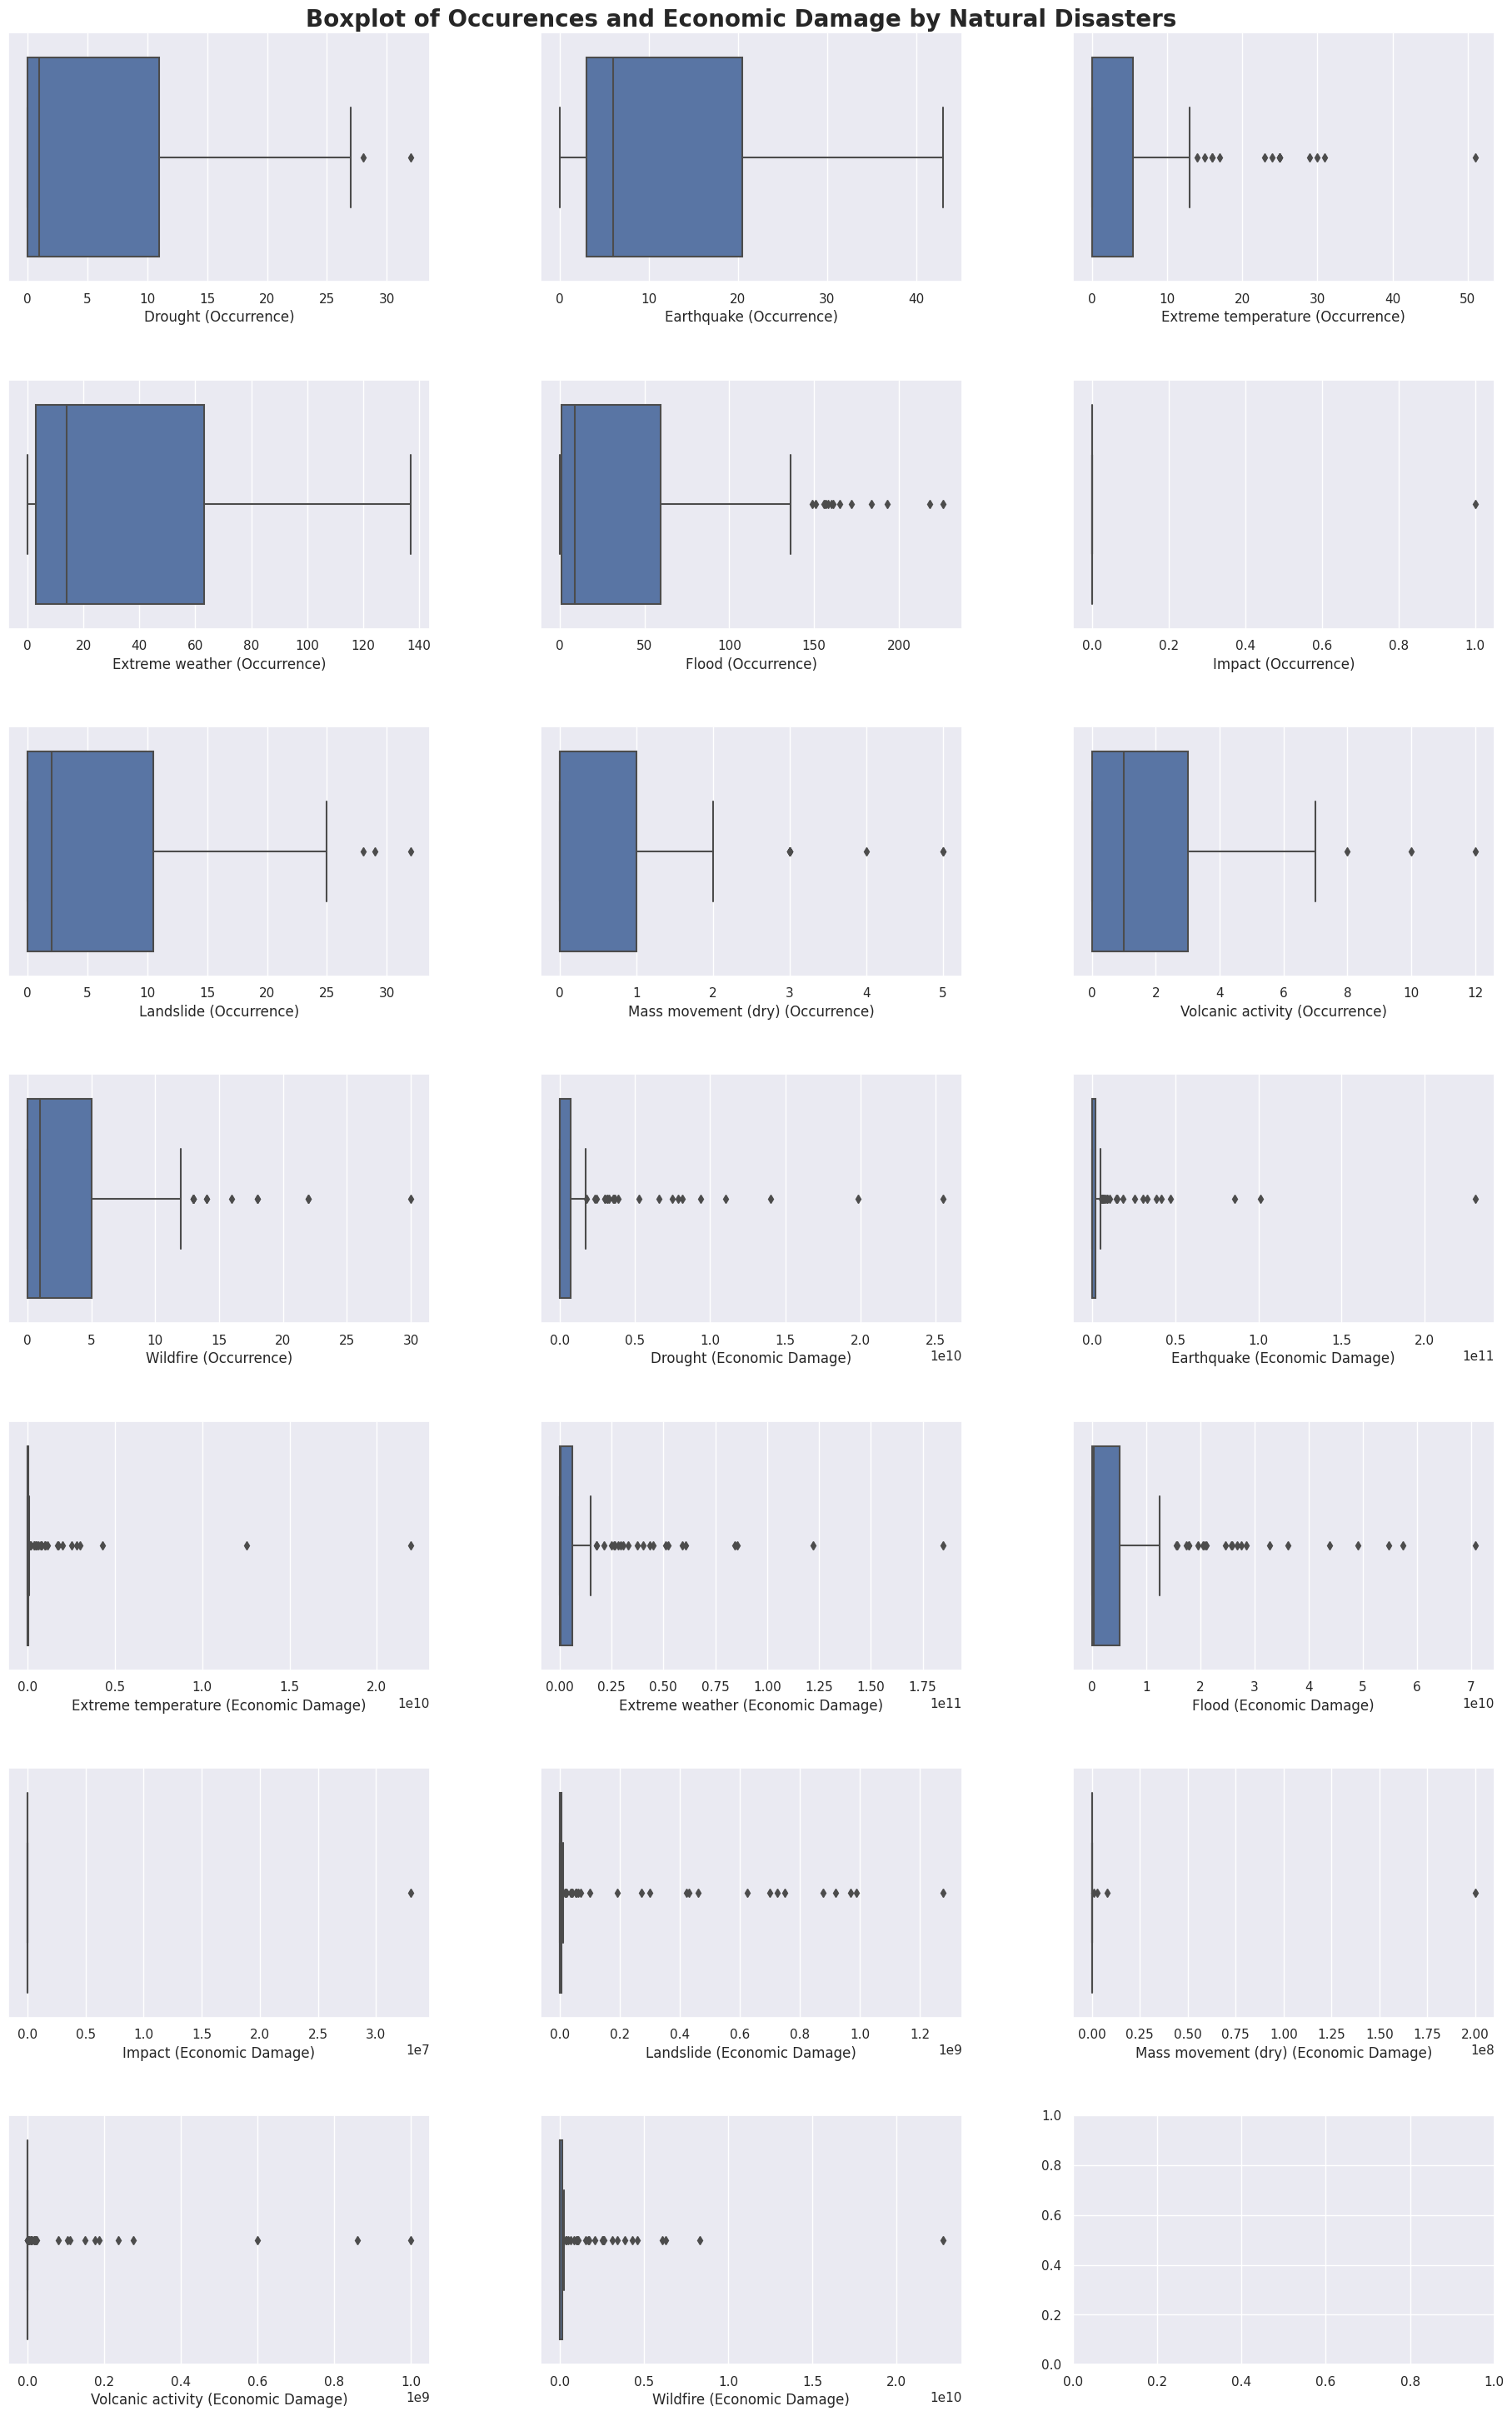

In [ ]:
# Create Subplots
fig, axes = plt.subplots(7, 3, figsize=(20,30))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Boxplot of Occurences and Economic Damage by Natural Disasters',fontweight='bold',fontsize = 20)

# Plot Data
sns.boxplot(ax=axes[0,0], data=df_merger, x='Drought (Occurrence)')
sns.boxplot(ax=axes[0,1], data=df_merger, x='Earthquake (Occurrence)')
sns.boxplot(ax=axes[0,2], data=df_merger, x='Extreme temperature (Occurrence)')
sns.boxplot(ax=axes[1,0], data=df_merger, x='Extreme weather (Occurrence)')
sns.boxplot(ax=axes[1,1], data=df_merger, x='Flood (Occurrence)')
sns.boxplot(ax=axes[1,2], data=df_merger, x='Impact (Occurrence)')
sns.boxplot(ax=axes[2,0], data=df_merger, x='Landslide (Occurrence)')
sns.boxplot(ax=axes[2,1], data=df_merger, x='Mass movement (dry) (Occurrence)')
sns.boxplot(ax=axes[2,2], data=df_merger, x='Volcanic activity (Occurrence)')
sns.boxplot(ax=axes[3,0], data=df_merger, x='Wildfire (Occurrence)')
sns.boxplot(ax=axes[3,1], data=df_merger, x='Drought (Economic Damage)')
sns.boxplot(ax=axes[3,2], data=df_merger, x='Earthquake (Economic Damage)')
sns.boxplot(ax=axes[4,0], data=df_merger, x='Extreme temperature (Economic Damage)')
sns.boxplot(ax=axes[4,1], data=df_merger, x='Extreme weather (Economic Damage)')
sns.boxplot(ax=axes[4,2], data=df_merger, x='Flood (Economic Damage)')
sns.boxplot(ax=axes[5,0], data=df_merger, x='Impact (Economic Damage)')
sns.boxplot(ax=axes[5,1], data=df_merger, x='Landslide (Economic Damage)')
sns.boxplot(ax=axes[5,2], data=df_merger, x='Mass movement (dry) (Economic Damage)')
sns.boxplot(ax=axes[6,0], data=df_merger, x='Volcanic activity (Economic Damage)')
sns.boxplot(ax=axes[6,1], data=df_merger, x='Wildfire (Economic Damage)')

# Show Plot
plt.show()

Berdasarkan boxplot diatas, dapat disimpulkan bahwa sebagian besar variabel memiliki outlier, hanya `Earthquake (Occurence)`dan`Extreme Weather (Occurence)` tidak memiliki outlier.

### ***Line Plot***

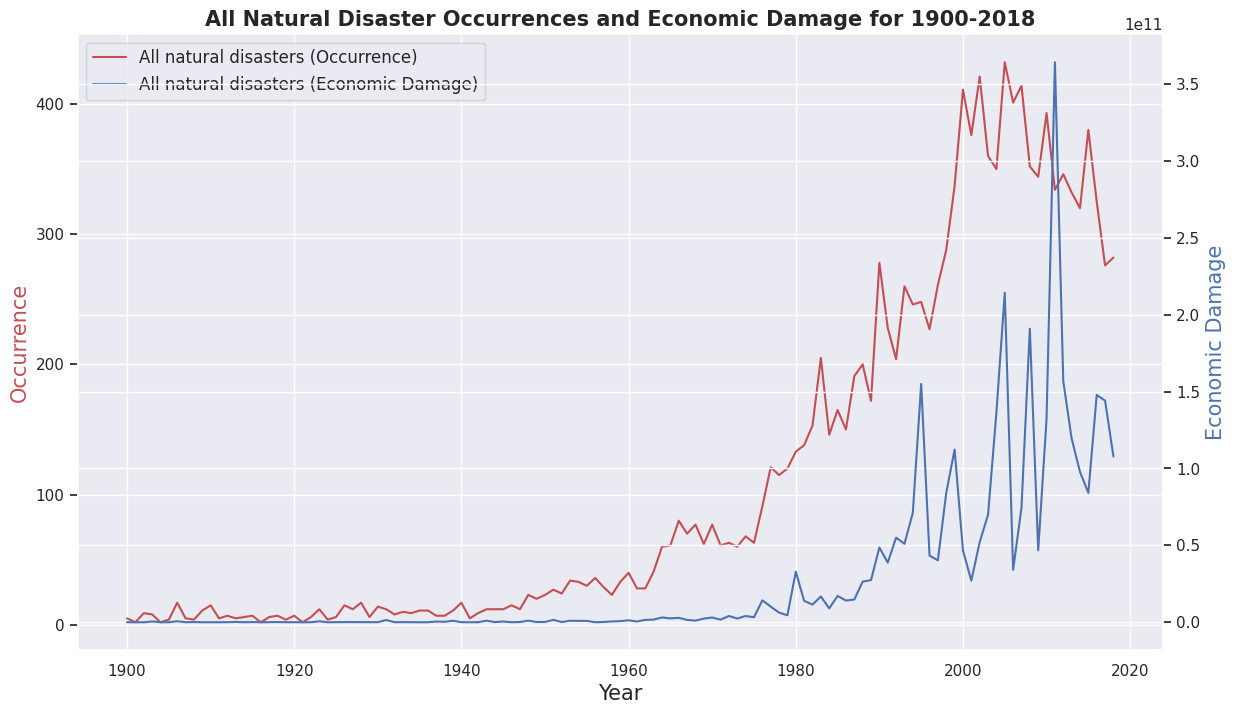

In [ ]:
# Create Subplots
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

# Plot Data
line1 = ax.plot(df_merger['All natural disasters (Occurrence)'], 'r', label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(df_merger['All natural disasters (Economic Damage)'], 'b', label = 'All natural disasters (Economic Damage)')

# Combine Lines and Labels
lines = line1 + line2
labels = [l.get_label() for l in lines]

# Set Title and Labels
plt.title('All Natural Disaster Occurrences and Economic Damage for 1900-2018',fontweight='bold', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Economic Damage', fontsize = 15, color = 'b')

# Legend
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

# Show Plot
plt.show()

Hasil line plot menunjukkan tren cenderung naik dari tahun ke tahun baik dari segi `Occurence` maupun `Economic Damage`. Tren naik menunjukkan bahwa nilai data cenderung meningkat secara bertahap dari tahun ke tahun. Ini bisa mengindikasikan pertumbuhan positif dalam variabel yang diamati. Akan tetapi, pada `Economic Damage`data mengalami beberapa pola berulang naik-turun yang sangat signifikan.

### ***Barplot***

In [ ]:
# Aggregate Table
agg=df.groupby('entity',as_index=False).agg({'frequency_reported':'sum','economic_damage':'sum'})
agg=agg.drop(0).sort_values('frequency_reported',ascending=False)
agg

,entity,frequency_reported,economic_damage
5,Flood,4960,7.882122e+11
4,Extreme weather,4129,1.281600e+12
2,Earthquake,1372,8.149014e+11
1,Drought,727,1.667620e+11
7,Landslide,712,1.048533e+10
3,Extreme temperature,575,6.286634e+10
10,Wildfire,430,8.823428e+10
9,Volcanic activity,249,3.933912e+09
8,Mass movement (dry),57,2.116000e+08
6,Impact,1,3.300000e+07


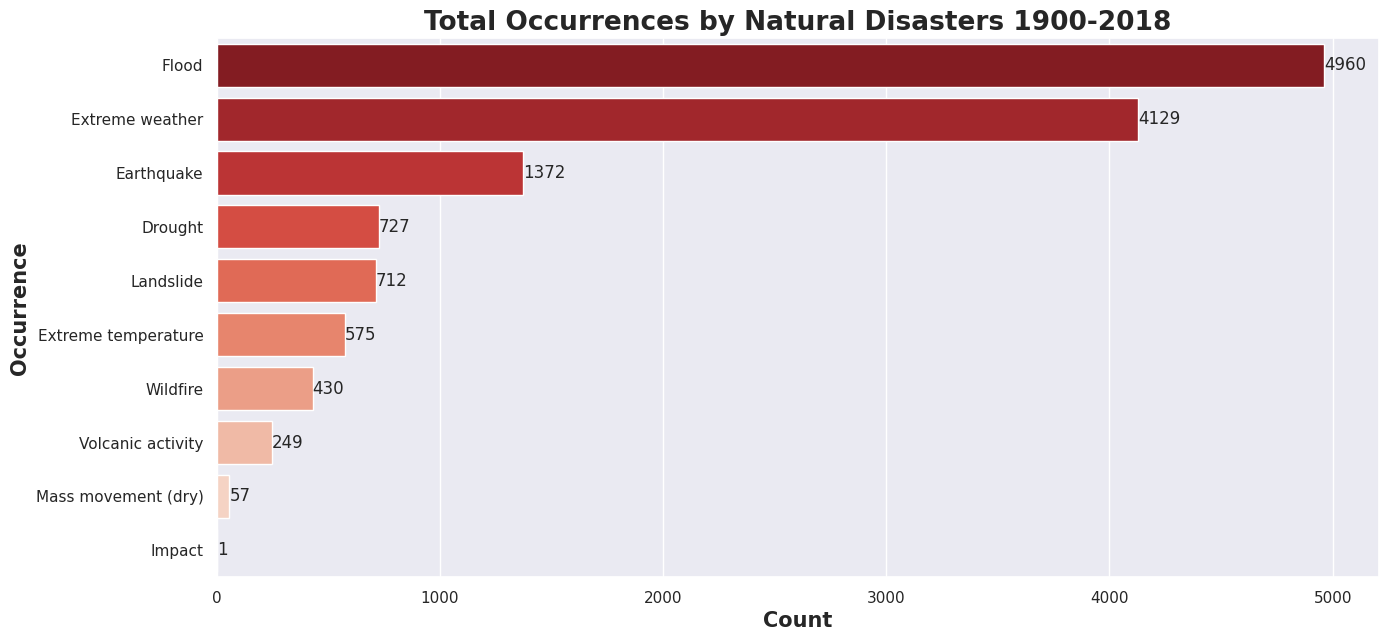

In [ ]:
# Create Subplots
plt.subplots(figsize=(15,7))

# Plot Data
ax=sns.barplot(y='entity',x='frequency_reported',data=agg ,palette='Reds_r',orient='h')

# Add Labels to the Bars
ax.bar_label(ax.containers[0])

# Set Title and Labels
plt.title('Total Occurrences by Natural Disasters 1900-2018', fontweight='bold',fontsize = 19)
plt.xlabel('Count', fontweight='bold',fontsize = 15)
plt.ylabel('Occurrence',fontweight='bold', fontsize = 15)

# Show Plot
plt.show()

Hasil barplot menunjukkan bahwa `Flood` merupakan kejadian bencana alam terbanyak selama tahun 1900-2018 sebanyak 4960 kejadian. Kemudian, pada urutan ke dua terbanyak terdapat bencana alam `Extreme Weather` sebanyak 4129 kejadian.

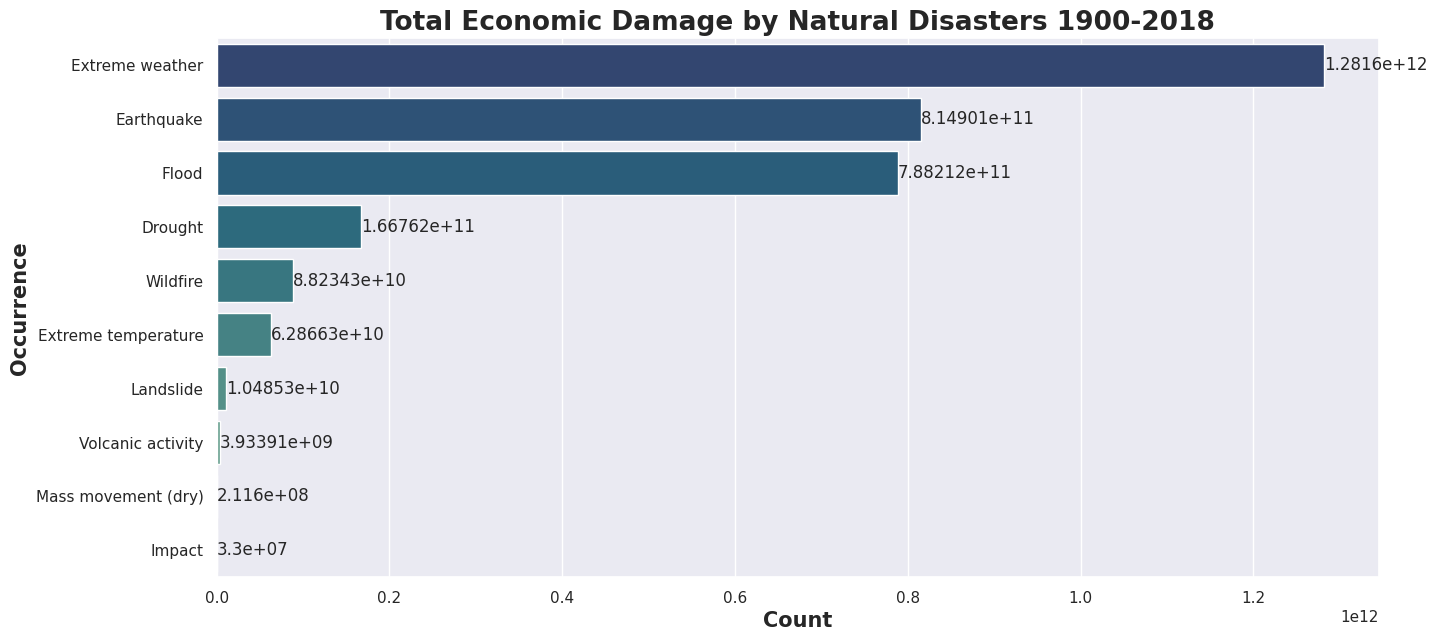

In [ ]:
# Create Subplots
plt.subplots(figsize=(15,7))

# Plot Data
ax=sns.barplot(y='entity',x='economic_damage',data=agg.sort_values('economic_damage',ascending=False),palette='crest_r',orient='h')

# Add Labels to the Bars
ax.bar_label(ax.containers[0])

# Set Title and Labels
plt.title('Total Economic Damage by Natural Disasters 1900-2018', fontweight='bold',fontsize = 19)
plt.xlabel('Count', fontweight='bold',fontsize = 15)
plt.ylabel('Occurrence',fontweight='bold', fontsize = 15)

# Show Plot
plt.show()

Hasil barplot menunjukkan bahwa bencana alam `Extreme Weather` memiliki kerusakan ekonomi terbanyak dibandingkan bencana alam yang lain, yaitu sejumlah 1,2816 trilliun US Dolar. Kemudian urutan kedua dengan kerusakan ekonomi terbanyak ada bencana alam `Earthquake` dengan kerusakan ekonomi sejumlah 814,9 miliar US Dolar. Kemudian, pada urutan ke dua terbanyak terdapat

### ***Scatterplot***

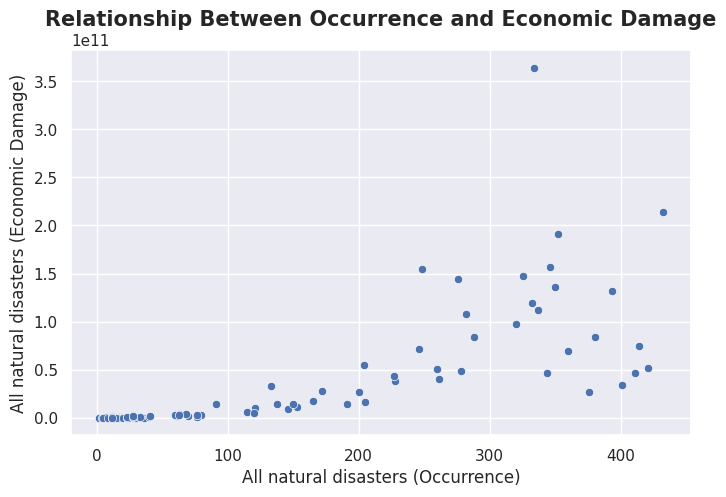

In [ ]:
# Create Subplots
plt.subplots(figsize=(8,5))

# Plot Data
sns.scatterplot(data=df_merger, x='All natural disasters (Occurrence)', y='All natural disasters (Economic Damage)')

# Set Title
plt.title('Relationship Between Occurrence and Economic Damage', fontweight='bold',fontsize = 15)

# Show Plot
plt.show()

Berdasarkan scatterplot `All natural disasters (Occurrence)` dan `All natural disasters (Economic Damage)` menunjukkan bahwa data cenderung membentuk pola menaik walaupun cenderung menyebar. Artinya, semakin banyak kejadian bencana alam, semakin besar kerusakan ekonomi yang terjadi

### by Natural Disaster

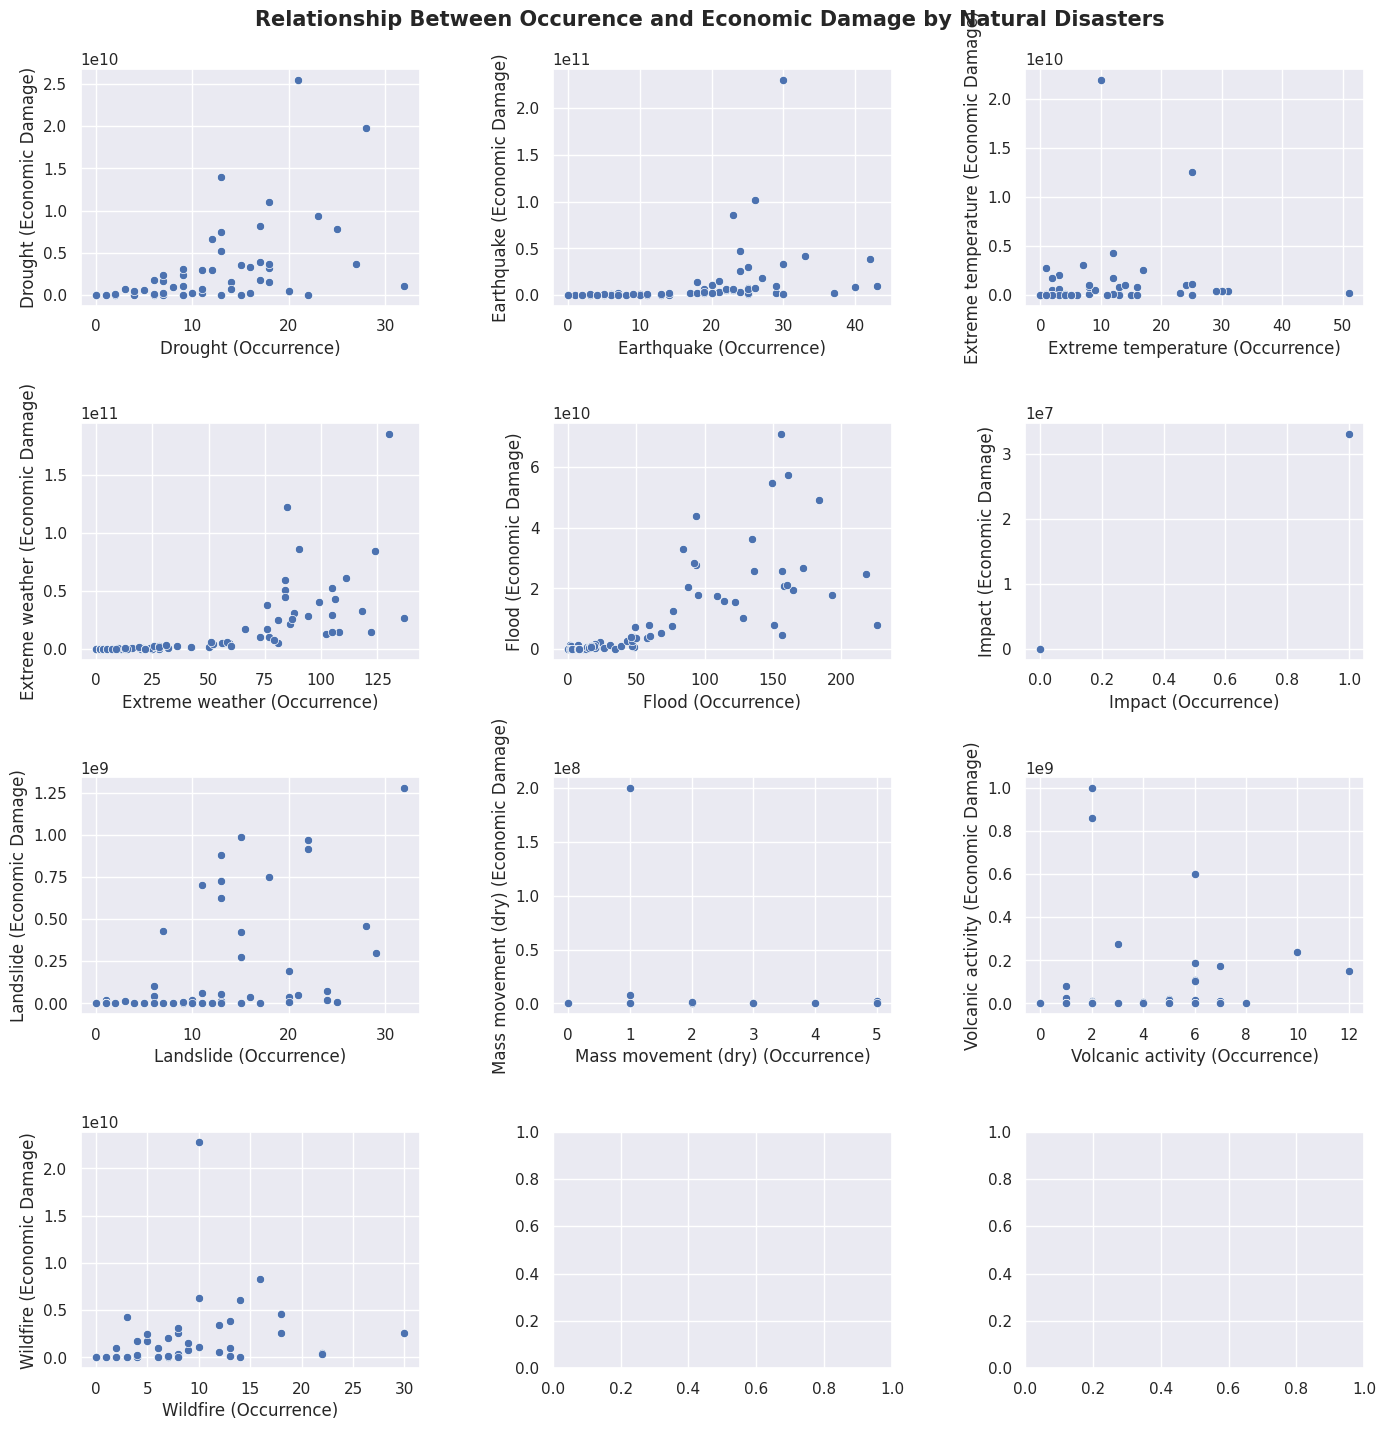

In [ ]:
# Create Subplots
fig, axes = plt.subplots(4, 3, figsize=(15,15))

# Adjust Layout
fig.tight_layout(pad=5)

# Set Title
fig.suptitle('Relationship Between Occurence and Economic Damage by Natural Disasters',fontweight='bold',fontsize = 15)

# Plot Data
sns.scatterplot(ax=axes[0,0], data=df_merger, x='Drought (Occurrence)', y='Drought (Economic Damage)')
sns.scatterplot(ax=axes[0,1], data=df_merger, x='Earthquake (Occurrence)', y='Earthquake (Economic Damage)')
sns.scatterplot(ax=axes[0,2], data=df_merger, x='Extreme temperature (Occurrence)', y='Extreme temperature (Economic Damage)')
sns.scatterplot(ax=axes[1,0], data=df_merger, x='Extreme weather (Occurrence)', y='Extreme weather (Economic Damage)')
sns.scatterplot(ax=axes[1,1], data=df_merger, x='Flood (Occurrence)', y='Flood (Economic Damage)')
sns.scatterplot(ax=axes[1,2], data=df_merger, x='Impact (Occurrence)', y='Impact (Economic Damage)')
sns.scatterplot(ax=axes[2,0], data=df_merger, x='Landslide (Occurrence)', y='Landslide (Economic Damage)')
sns.scatterplot(ax=axes[2,1], data=df_merger, x='Mass movement (dry) (Occurrence)', y='Mass movement (dry) (Economic Damage)')
sns.scatterplot(ax=axes[2,2], data=df_merger, x='Volcanic activity (Occurrence)', y='Volcanic activity (Economic Damage)')
sns.scatterplot(ax=axes[3,0], data=df_merger, x='Wildfire (Occurrence)', y='Wildfire (Economic Damage)')

# Show Plot
plt.show()

Berdasarkan scatterplot antara `Occurence` dengan `Economic Damage` didapatkan hasil bahwa scatterplot pada variabel `impact`,`extreme temperature`, `mass movement(dry)`, `volcanic activity`, `wildfire`  tidak membentuk pola tertentu. Ketika titik-titik data tersebar secara acak atau membentuk pola yang tidak jelas, ini menunjukkan bahwa perubahan dalam satu variabel tidak berhubungan secara konsisten dengan perubahan dalam variabel lainnya. Dalam hal ini, tidak ada korelasi yang signifikan antara kedua variabel.

Selain variabel-variabel yang telah disebutkan, variabel lain memiliki titik pada scatterplot cenderung membentuk pola menaik walaupun cenderung menyebar. Hal tersebut menunjukan bahwa terdapat peningkatan `Occurence` berhubungan dengan peningkatan `Economic Damage`.



### ***Correlation***

In [ ]:
# Compute Correlation Matrix
corr = df_merger.corr(method = 'pearson')
corr

entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Impact (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
entity,,,,,,,,,,,,,,,,,,,,,
All natural disasters (Occurrence),1.000000,0.852681,0.905037,0.859034,0.970388,0.978469,0.152498,0.891583,0.333352,0.763867,...,0.556305,0.399043,0.328906,0.681006,0.757855,0.152498,0.463244,-0.050067,0.189727,0.449946
Drought (Occurrence),0.852681,1.000000,0.817348,0.685116,0.827713,0.784819,0.034458,0.776016,0.392538,0.697611,...,0.588533,0.297626,0.255473,0.495328,0.597996,0.034458,0.524014,-0.069973,0.245118,0.358323
Earthquake (Occurrence),0.905037,0.817348,1.000000,0.720519,0.917506,0.830065,0.148577,0.773562,0.394065,0.683803,...,0.515238,0.399111,0.319967,0.573284,0.671758,0.148577,0.435626,-0.064762,0.251841,0.371508
Extreme temperature (Occurrence),0.859034,0.685116,0.720519,1.000000,0.780981,0.864516,0.096617,0.745373,0.164033,0.562884,...,0.602734,0.308486,0.220117,0.682268,0.641985,0.096617,0.346482,-0.036145,0.087089,0.482994
Extreme weather (Occurrence),0.970388,0.827713,0.917506,0.780981,1.000000,0.913458,0.165522,0.852957,0.414545,0.737223,...,0.549784,0.373152,0.312789,0.683994,0.718696,0.165522,0.457191,-0.042909,0.185730,0.425793
Flood (Occurrence),0.978469,0.784819,0.830065,0.864516,0.913458,1.000000,0.167990,0.859188,0.240258,0.743670,...,0.518421,0.417984,0.348359,0.677382,0.766809,0.167990,0.403496,-0.045425,0.165599,0.444915
Impact (Occurrence),0.152498,0.034458,0.148577,0.096617,0.165522,0.167990,1.000000,0.059014,0.048227,0.033192,...,-0.007889,0.008319,0.018380,0.150305,0.334503,1.000000,-0.033407,0.031360,-0.022271,0.012397
Landslide (Occurrence),0.891583,0.776016,0.773562,0.745373,0.852957,0.859188,0.059014,1.000000,0.305517,0.666421,...,0.435723,0.331474,0.237493,0.527043,0.705026,0.059014,0.581042,-0.043909,0.125846,0.367499
Mass movement (dry) (Occurrence),0.333352,0.392538,0.394065,0.164033,0.414545,0.240258,0.048227,0.305517,1.000000,0.375068,...,0.128050,0.041985,0.213153,0.148713,0.146145,0.048227,0.408798,0.056278,0.231555,0.120410


<Axes: xlabel='entity', ylabel='entity'>

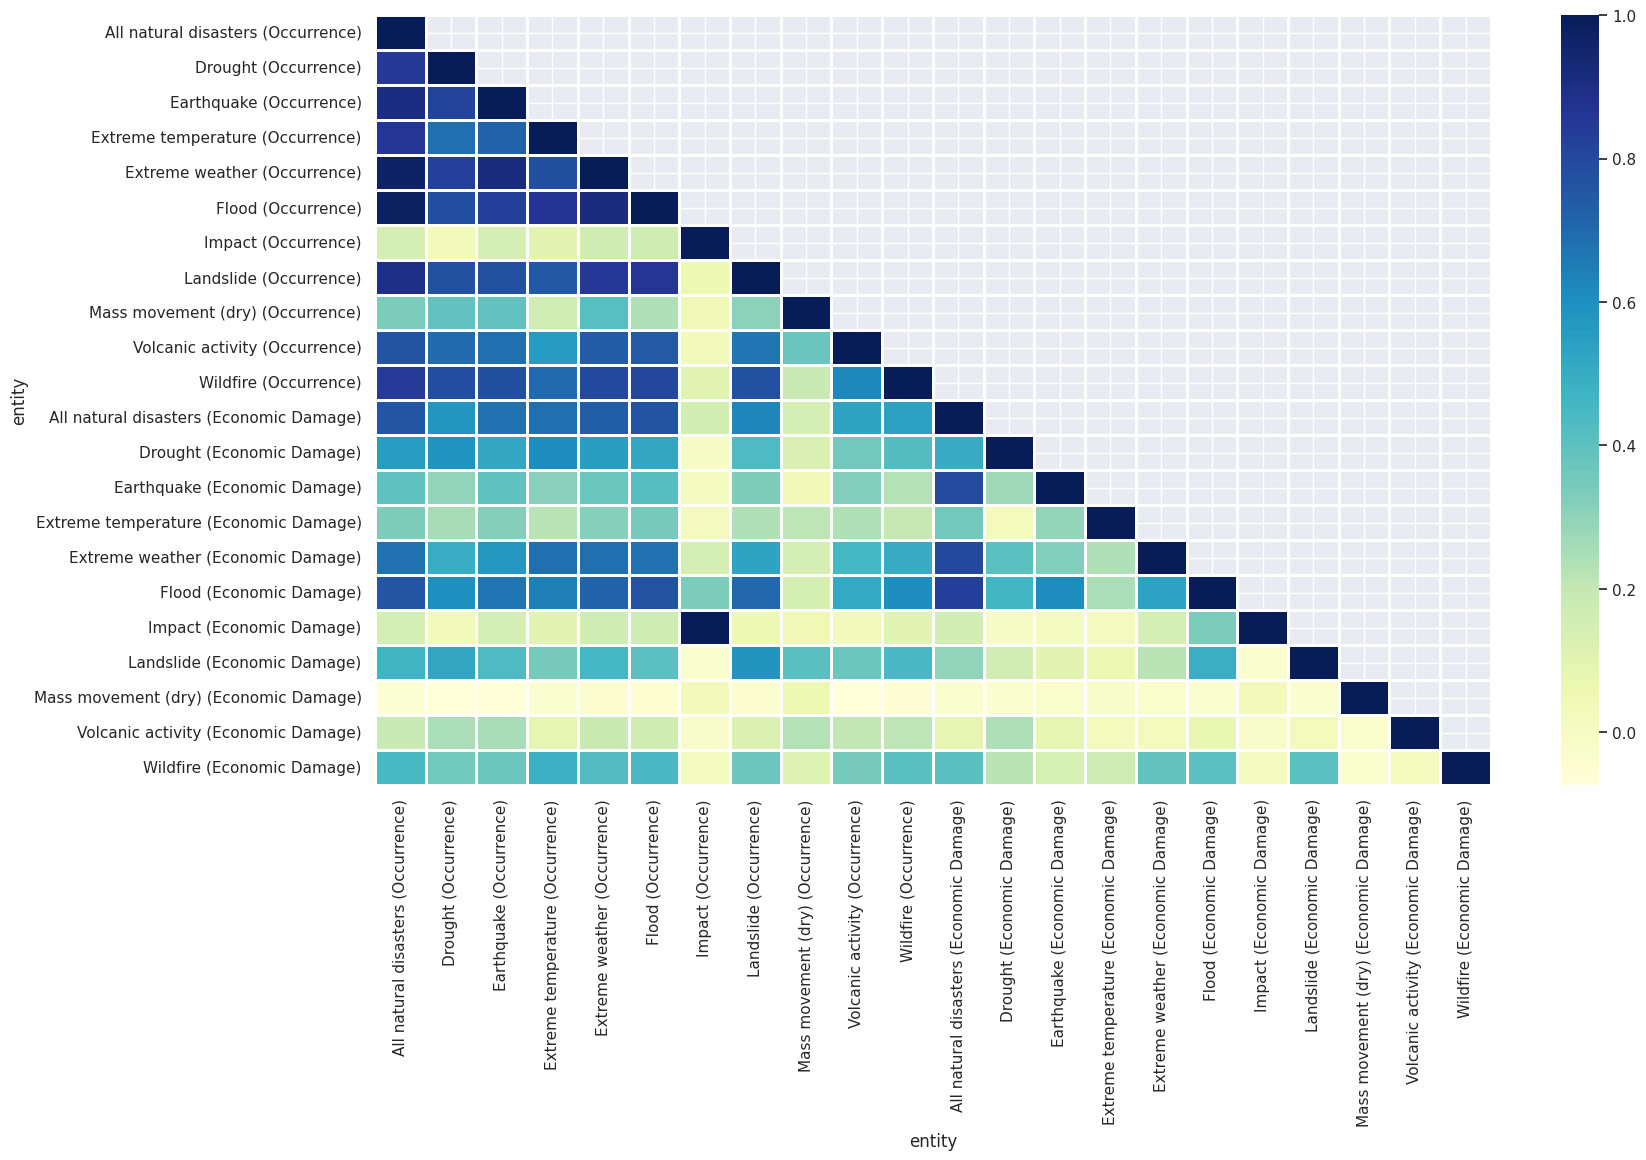

In [ ]:
# Create Subplots
fig, ax = plt.subplots(figsize = (18, 10))

# Create Mask
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plot Data
sns.heatmap(df_merger.corr(), cmap="YlGnBu", annot=False, linewidths=1, mask=mask)

### ***Linier Regression***

Text(0, 0.5, 'Economic Damage')

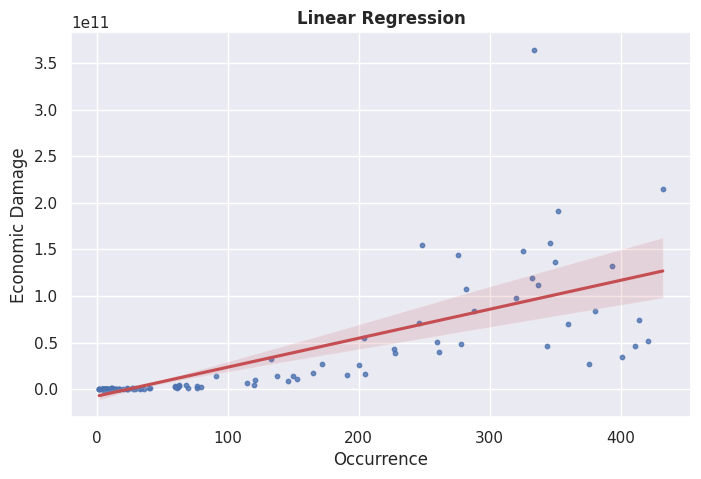

In [ ]:
# Plot Linier Regression
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(data=df_merger, x='All natural disasters (Occurrence)', y='All natural disasters (Economic Damage)',scatter_kws= {'s':10},line_kws=dict(color="r"))
plt.title('Linear Regression', fontsize = 12,fontweight='bold')
plt.xlabel("Occurrence",fontsize = 12)
plt.ylabel("Economic Damage",fontsize = 12)

Plot diatas menunjukkan bahwa terdapat pola menaik pada data. Artinya, terdapat hubungan positif antara `Occurence` dengan `Economic Damage`

In [ ]:
import statsmodels.api as sm

# Adding a constant to get an intercept
occurence_sm = sm.add_constant(df_merger['All natural disasters (Occurrence)'])

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(df_merger['All natural disasters (Economic Damage)'], occurence_sm).fit()

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     All natural disasters (Economic Damage)   R-squared:                       0.570
Model:                                                 OLS   Adj. R-squared:                  0.566
Method:                                      Least Squares   F-statistic:                     154.9
Date:                                     Sun, 19 Nov 2023   Prob (F-statistic):           3.67e-23
Time:                                             16:16:08   Log-Likelihood:                -3061.5
No. Observations:                                      119   AIC:                             6127.
Df Residuals:                                          117   BIC:                             6133.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -7.477e+09   4.34e+09     -1.725      0.087   -1.61e+10    1.11e+09
All natural disasters (Occurrence)  3.109e+08    2.5e+07     12.445      0.000    2.61e+08     3.6e+08
==============================================================================
Omnibus:                      126.235   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3222.912
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      27.534   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Nilai `R-squared` = 0.570, yang berarti 57% `Economic Damage` dapat dijelaskan oleh `Occurrence` menggunakan garis ini.
2. Nilai `P-Value`= 0.000 < `Sig`= 0.05, yang berarti kesesuaian model signifikan secara statistik. Sehingga dapat disimpulkan bahwa variabel `Occurence` memiliki dampak yang signifikan terhadap variabel `Economic Damage`
3. Dari parameter, kita mendapatkan nilai intercept dan slope untuk garis lurus. Persamaan garisnya adalah,
`Economic Damage` = -7.477 miliar + 310.9 juta * `Occurrence`

### ***Clustering***

In [ ]:
dff=df_merger[['All natural disasters (Occurrence)','All natural disasters (Economic Damage)']]
dff.head()

entity,All natural disasters (Occurrence),All natural disasters (Economic Damage)
year,,
1900,5.0,30000000.0
1901,2.0,0.0
1902,9.0,0.0
1903,8.0,480000000.0
1904,2.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

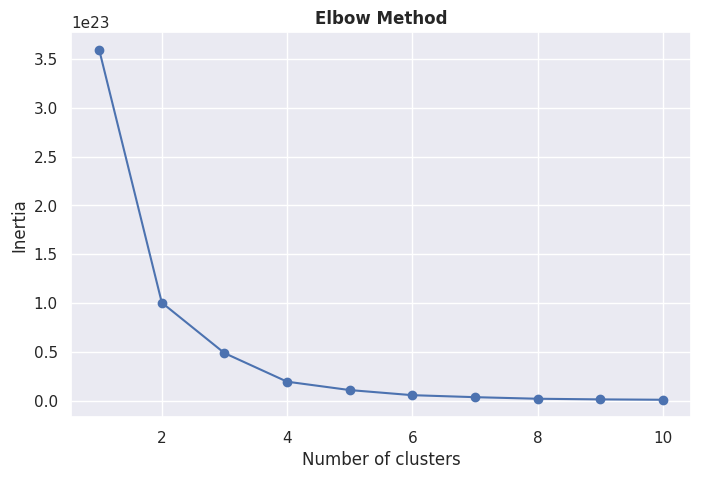

In [ ]:
from sklearn.cluster import KMeans

# Calculate distortion for a range of clusters (k values)
elbow_scores = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dff)
    elbow_scores.append(kmeans.inertia_)

# Plot the elbow curve
fig, ax = plt.subplots(figsize = (8, 5))
plt.plot(k_range, elbow_scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method',fontsize = 12,fontweight='bold')
plt.show()

Pada grafik di atas, titik ke 2 mengalami penurunan, mulai melambat dan membentuk pola seperti siku (elbow). Sehingga, 2 dianggap sebagai jumlah kluster optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


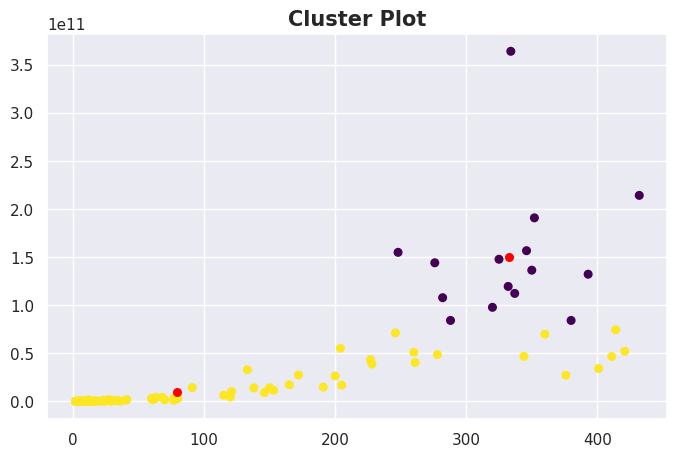

In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=2).fit(dff)
centroids = kmeans.cluster_centers_

# Plot the clusters
fig, ax = plt.subplots(figsize = (8, 5))
plt.scatter(data=dff,x='All natural disasters (Occurrence)',y='All natural disasters (Economic Damage)', c= kmeans.labels_.astype(float), s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=30)
plt.title("Cluster Plot",fontweight='bold',fontsize = 15)
plt.show()

### ***Forecasting***

In [ ]:
# Split the data into training and testing sets
train_size = int(len(dff) * 0.95)
train, test = dff[:train_size], dff[train_size:]

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
# Use auto_arima to find the best ARIMA model
model1 = auto_arima(train['All natural disasters (Occurrence)'], trace=True, error_action='ignore', suppress_warnings=True)
model2 = auto_arima(train['All natural disasters (Economic Damage)'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1008.621, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1038.076, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1024.242, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1023.286, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1037.797, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1026.319, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1013.030, Time=0.76 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1009.039, Time=1.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1008.419, Time=1.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1018.803, Time=1.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1010.187, Time=1.38 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1009.728, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1019.433, Time=0.30 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1012.010, Time=0.67 sec
 ARIMA(2,1,3)(0,0,0)[0]          

In [ ]:
# Fit the best ARIMA model to the training data
model1.fit(train['All natural disasters (Occurrence)'])

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
model2.fit(train['All natural disasters (Economic Damage)'])

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# Forecast future values based on the trained ARIMA model
forecast1 = model1.predict(n_periods=10)
forecast1= pd.Series(forecast1)
forecast1.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


113    331.663657
114    341.616800
115    354.873051
116    334.068208
117    366.774386
dtype: float64

In [ ]:
forecast2 = model2.predict(n_periods=10)
forecast2= pd.Series(forecast2)
forecast2.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


113    1.079049e+11
114    3.313672e+11
115    2.030995e+11
116    1.015200e+11
117    2.946830e+11
dtype: float64

In [ ]:
# Convert the last index of the test set to years
last_test_year = test.index[-1]

# Create an integer-based future index
new_index = pd.Index(range(last_test_year + 1, last_test_year + 10 + 1))
forecast1.index = new_index
forecast2.index = new_index
print(forecast1)
print(forecast2)

2019    331.663657
2020    341.616800
2021    354.873051
2022    334.068208
2023    366.774386
2024    342.969630
2025    362.102568
2026    363.741350
2027    353.501600
2028    379.720028
dtype: float64
2019    1.079049e+11
2020    3.313672e+11
2021    2.030995e+11
2022    1.015200e+11
2023    2.946830e+11
2024    2.370588e+11
2025    1.082645e+11
2026    2.590513e+11
2027    2.584391e+11
2028    1.237477e+11
dtype: float64


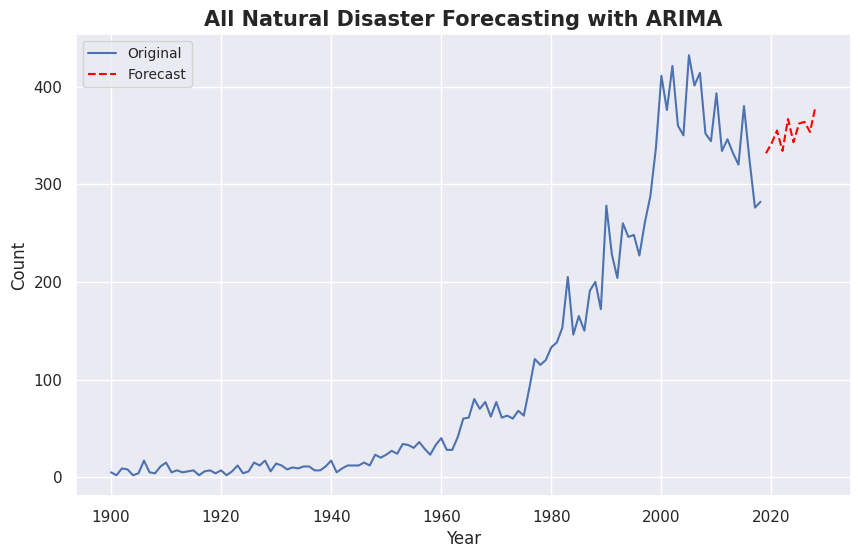

In [ ]:
# Plot the original time series and forecasted values
plt.subplots(figsize = (10, 6))
plt.plot(dff['All natural disasters (Occurrence)'], label='Original')
plt.plot(forecast1, color = "red", label='Forecast', linestyle='--')
plt.title("All Natural Disaster Forecasting with ARIMA",fontweight='bold',fontsize = 15)
plt.ylabel("Count")
plt.xlabel('Year')
plt.legend(loc = 2, prop = {'size': 10})
plt.show()

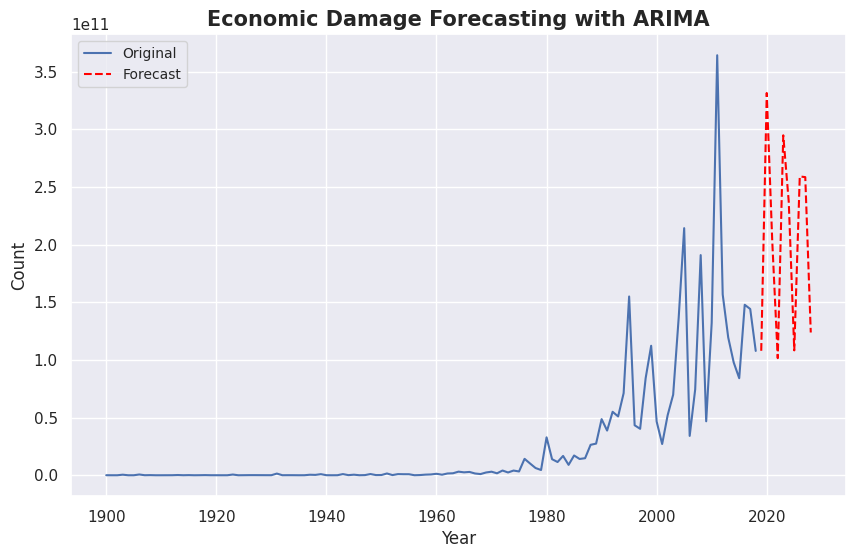

In [ ]:
plt.subplots(figsize = (10, 6))
plt.plot(dff['All natural disasters (Economic Damage)'],label='Original')
plt.plot(forecast2, color = "red",label='Forecast', linestyle='--')
plt.title("Economic Damage Forecasting with ARIMA",fontweight='bold',fontsize = 15)
plt.ylabel("Count")
plt.xlabel('Year')
plt.legend(loc = 2, prop = {'size': 10})
plt.show()

[Data Product Development (Dashboard)](https://lookerstudio.google.com/reporting/59899d61-b21f-4434-91cb-9fa2cae587e2)